<a href="https://colab.research.google.com/github/IronicNinja/interesting_colabs/blob/master/HiMCM_Team_11318_Code_(Problem_B).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# HiMCM Team 11318 Code (Problem B)

The following is the code used for Team 11318's conservation project schedule. If you wish to change the variables, please create a copy of this notebook, change your variables, and then run all the cells.

In [ ]:
inflation_rate = 1 #There is currently no inflation rate. Example: Initialize this variable is 1.02 if there is a 2% inflation rate.
interest = 1.084 #The interest rate is currently 8.4%.
raise_more = 1.1 #The fundraising target is 10% more than the minimum fundraising required for that year.

To use the following code, ensure that you have our spreadsheet on your Google Drive. You might need to make a copy, but make sure that the spreadsheet is named the exact same thing as ours is and that the sheet names within the spreadsheet are consistent with this code; otherwise, there may be errors.

[Click here to access the spreadsheet](https://docs.google.com/spreadsheets/d/1zWrVgkEzTWk_HVcyg5kXAGAY-ejOrANQ_9_5ilNj8yU/edit#gid=1496613981)

In [ ]:
!pip install --upgrade gspread #required to read Google Sheets from Drive

Requirement already up-to-date: gspread in /usr/local/lib/python3.6/dist-packages (3.6.0)


In [ ]:
from google.colab import auth
auth.authenticate_user()

import gspread
from oauth2client.client import GoogleCredentials

gc = gspread.authorize(GoogleCredentials.get_application_default()) #Connect to Google Drive. Make sure to authorize the application!

The above code block requires you to authenticate yourself with a key. Make sure you do so, or else the code below won't work.

In [ ]:
"""Essential data science imports"""
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

"""Use Gspread to get the information from the spreadsheets"""
ws = gc.open('HiMCM2020ProblemB_ThreatenedPlantsData')
sheet = ws.worksheet('New Pairings')
df = pd.DataFrame(sheet.get_all_records())
#print(df)

sheet_cost = ws.worksheet('Original')
cost_df = pd.DataFrame(sheet_cost.get_all_records())
#print(cost_df)

In the following code block, we do two things. First, we create a plant_list_org list, consisting of the project number and the length of the pair. Second, we create a dictionary that consists of the project number and the two unique ids that it is mapped to. In this way, we can access the dictionary later using the project number and find the unique ids of the projects.

In [ ]:
plant_list_org = []
cost_list = []
for x in range(len(df)):
  plant_list_org.append([df['Project number'][x], df['Length of pair'][x]])
  cost_list.append((df['Project number'][x], [df['unique_id'][x], df['unique_id2'][x]]))

cost_dict = dict(cost_list) #Create dictionary

Next, we create a years_list numpy array, which we will find in project number values using the greedy approach we describe in our paper. Index 0 for this list represents year 6 in our project.

In [ ]:
"""Greedy Algorithm"""
plant_list = plant_list_org.copy()
years_list = np.zeros([24])
for year in range(26):
  for plant in plant_list:
    if plant[1] < year+2:
      years_list[year] = plant[0]
      plant_list.remove(plant)
      break

print(years_list) #View the projects that should be completed on each year

[ 0.  0. 19.  0.  1.  5. 10. 12.  2.  6.  7.  9. 14.  3. 15. 11.  4. 16.
 17. 13. 18.  0.  0.  8.]


In [ ]:
starting_times = [[] for x in range(24)]
"""Driver code for calculating cost"""
cost_list = np.zeros([24])
for index in range(len(years_list)):
  project = years_list[index]
  if project == 0:
    continue #if that year doesn't have a project, skip it
  
  p1 = cost_dict[project][0] #project 1
  p2 = cost_dict[project][1] #project 2
  for row in range(len(cost_df)):
    time = cost_df['Length of Project'][row]
    uuid = cost_df['unique_id'][row]
    if uuid == p1:
      starting_times[index-time+1].append(uuid)
    elif uuid == p2:
      starting_times[index-time+1].append(uuid)

    if uuid == p1 or uuid == p2:
      c = 6 #Column 6 has year 1 cost

      """Add cost by reverse searching the spreadsheet using the length of the project"""
      for year in range(index-time+1, index+1):
        cost = float(str(cost_df.iloc[row][c]).replace(',', ''))
        cost_list[year] += cost*pow(inflation_rate, year+5)
        c += 1

Output when we should start the projects.

In [ ]:
print(starting_times)

[['1-Flowering Plants-183', '1-Flowering Plants-137', '1-Flowering Plants-452', '1-Flowering Plants-492', '1-Flowering Plants-560', '1-Flowering Plants-551', '1-Flowering Plants-173', '1-Flowering Plants-122', '1-Flowering Plants-415', '1-Flowering Plants-186'], ['1-Flowering Plants-135', '1-Flowering Plants-553', '1-Flowering Plants-517', '1-Flowering Plants-127'], ['1-Flowering Plants-476', '1-Flowering Plants-486'], ['1-Flowering Plants-168', '1-Flowering Plants-507'], ['1-Flowering Plants-480', '1-Flowering Plants-528'], ['1-Flowering Plants-475', '1-Flowering Plants-546', '1-Flowering Plants-519'], ['1-Lichens-567'], [], ['1-Flowering Plants-442'], ['1-Flowering Plants-436', '1-Flowering Plants-426'], ['1-Flowering Plants-440'], ['1-Flowering Plants-558'], ['1-Flowering Plants-508'], ['1-Flowering Plants-176', '1-Flowering Plants-524'], ['1-Flowering Plants-557'], ['1-Flowering Plants-485', '1-Flowering Plants-543'], ['1-Flowering Plants-529', '1-Flowering Plants-513'], [], [], ['

Now we can visualize our plan with a graph.

[2834874.38 3107578.58 2985540.44 3037991.   3079804.49 3079892.02
 2811026.16 2615332.49 2467336.35 2362794.15 2422096.5  2341360.84
 2362040.37 2367669.19 2050143.26 1911345.62 1816797.11 1587517.11
 1379085.23 1330033.06  129535.    121522.58   39699.02   39305.96]


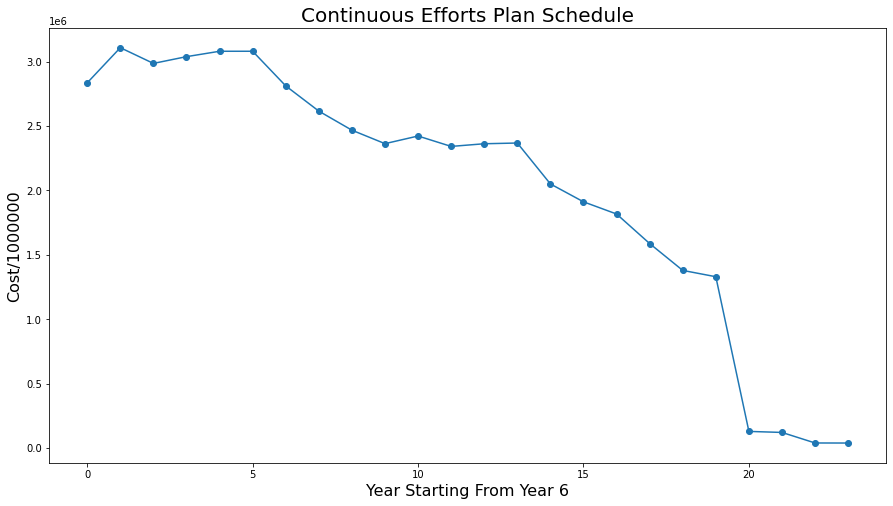

In [ ]:
print(cost_list)
plt.figure(figsize=(15, 8))
plt.plot(cost_list, marker='o')
plt.title("Continuous Efforts Plan Schedule", fontsize=20)
plt.xlabel("Year Starting From Year 6", fontsize=16)
plt.ylabel("Cost/1000000", fontsize=16)
plt.show()

# Calculating the Initial Portfolio

This section uses similar techniques as the section above to calculate the minimum standard deviation of cost for each of the possible configurations of portfolios. The calculations below assume that we can end our initial projects on year 3, 4, or 5.

In [ ]:
init = ws.worksheet('Initial Portfolio')
init_df = pd.DataFrame(init.get_all_records())

In [ ]:
"""Code for finding static costs (projects with length=5)"""
static = ['1-Flowering Plants-179', '1-Flowering Plants-514', '1-Flowering Plants-530']
init_cost_n = np.zeros([5])
for plant in static:
  for row in range(len(cost_df)):
    if cost_df['unique_id'][row] == plant:
      c = 6
      for x in range(5):
        cost = float(str(cost_df.iloc[row][c]).replace(',', ''))
        init_cost_n[x] += cost
        c += 1

"""Driver function for calculating costs. Returns a list of costs for each year given a certain configuration of projects"""
def get_costs(p):
  init_cost = init_cost_n.copy()

  for index in range(3):
    proj_list = p[index]
    for proj in proj_list:
      for row in range(len(cost_df)):
        if cost_df['unique_id'][row] == proj:
          c = 6
          for x in range(index, index+3):
            cost = float(str(cost_df.iloc[row][c]).replace(',', ''))
            init_cost[x] += cost*pow(inflation_rate, x)
            c += 1
  return init_cost

"""Code for adding/removing projects"""
def permutations(x, row):
  try:
    p[(x-1)%3].remove(init_df['unique_id'][row])
  except:
    pass
  p[x].append(init_df['unique_id'][row])

We implement a bash method, which calculates all possible permutations of projects. We then use the get_costs() function above to get the cost of the first 5 years given our configuration. Similar techniques can be used to calculate all configurations of different initial portfolios.

In [ ]:
p = [[], [], []]
init_cost_list = []
for a in range(3):
  print(a)
  permutations(a, 0)
  for b in range(3):
    permutations(b, 1)
    for c in range(3):
      permutations(c, 2)
      for d in range(3):
        permutations(d, 3)
        for e in range(3):
          permutations(e, 4)
          for f in range(3):
            permutations(f, 5)
            for g in range(3):
              permutations(g, 6)
              init_cost_list.append(get_costs(p))

0
1
2


Now we find the standard deviation of each configuration, sort it by least to greatest, and print the std and index of the project with the lowest std.

In [ ]:
min_std = []
for index in range(len(init_cost_list)):
  min_std.append([np.std(init_cost_list[index]), index])

min_std.sort()
print(min_std[0])
test_costs = init_cost_list[min_std[0][1]]

[154377.7283917789, 2131]


# Visualizations

In the following sections, you can visualize the minimum fundraising required every year given the initialized variables. We show both the minimum fundraising required per year and how much money the board would be able to save by using our investment strategy.

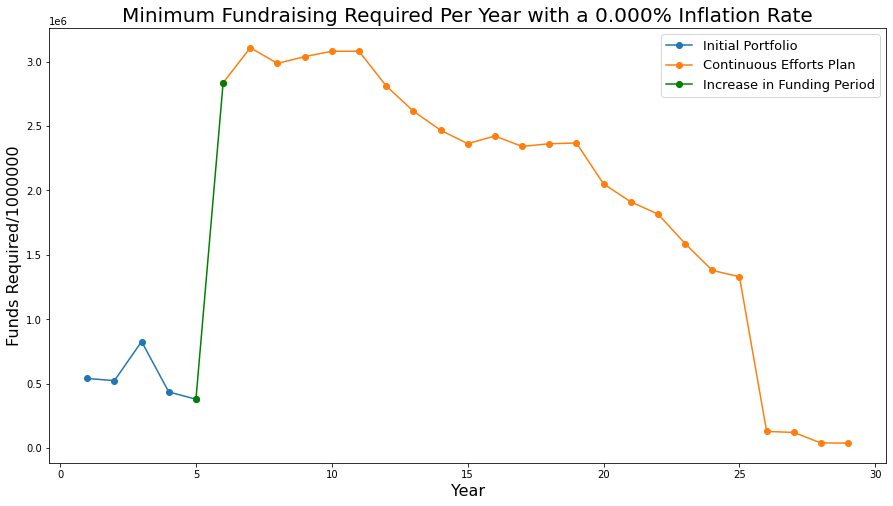

In [ ]:
last_cost = test_costs[4]
first_cost = cost_list[0]
plt.figure(figsize=(15, 8))
plt.plot(np.arange(1, 6), test_costs, marker='o')
plt.plot(np.arange(6, 30), cost_list, marker='o')
plt.plot([5, 6], [last_cost, first_cost], color='green', marker='o')
plt.legend(['Initial Portfolio', 'Continuous Efforts Plan', 'Increase in Funding Period'], prop={'size':13})
plt.title("Minimum Fundraising Required Per Year with a %.3f%s Inflation Rate" % (100*(inflation_rate-1), '%'), fontsize=20)
plt.xlabel("Year", fontsize=16)
plt.ylabel("Funds Required/1000000", fontsize=16)
#plt.annotate("Extra Funding Required: %d" % (first_cost-last_cost), (5.8, (last_cost+first_cost)/2))
plt.show()

In [ ]:
"""Append all the data into one array"""
all_data = test_costs.copy()
for x in range(len(cost_list)):
  all_data = np.append(all_data, cost_list[x])

Year to Stop: 19
Total Cost Without Investments: 50986108.47
Total Cost With Investments: 46428632.89
Total Money Saved: 4557475.58


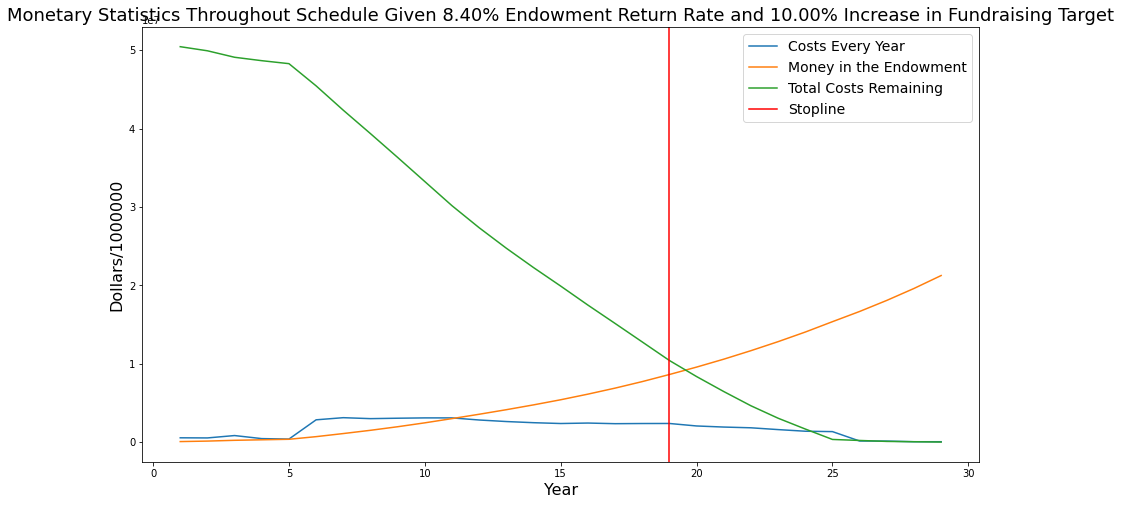

In [ ]:
total_costs = np.sum(all_data)
bank = 0
bank_list = []
total_cost_list = []
index = 0
go = True

for i in range(len(all_data)):
  num = all_data[i]
  extra_money = num*(raise_more-1)
  bank += extra_money
  bank *= interest
  bank_list.append(bank)
  total_costs -= num
  total_cost_list.append(total_costs)

  if total_costs < bank and go:
    index = i
    go = False

total_costs = np.sum(all_data)
alt_money = (total_costs-total_cost_list[index-1])*raise_more+(total_cost_list[index-1]-bank_list[index-1])
print("Year to Stop: %d" % (index))
print("Total Cost Without Investments: %.2f" % total_costs)
print("Total Cost With Investments: %.2f" % alt_money)
print("Total Money Saved: %.2f" % (total_costs-alt_money))

plt.figure(figsize=(15, 8))
plt.plot(np.arange(1, 30), all_data)
plt.plot(np.arange(1, 30), bank_list)
plt.plot(np.arange(1, 30), total_cost_list)
plt.title("Monetary Statistics Throughout Schedule Given %.2f%s Endowment Return Rate and %.2f%s Increase in Fundraising Target" % (
    100*(interest-1), '%', 100*(raise_more-1), '%'
), fontsize=18)
plt.xlabel("Year", fontsize=16)
plt.ylabel("Dollars/1000000", fontsize=16)
plt.axvline(x=index, color='red')
plt.legend(['Costs Every Year', 'Money in the Endowment', 'Total Costs Remaining', 'Stopline'], prop={'size': 14})
plt.show()